# Random Forest Regression

課程範例程式及資料檔下載網址： https://www.superdatascience.com/machine-learning/

## Importing the Libraries 載入套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## Importing the Dataset 讀入資料

利用 pd.read_csv 來載入資料，這組資料是一個 10 列(row) 3 行(column) 職稱位階與薪資的資料，其中共包含了 10 個位階的資訊。

In [2]:
path = '/Users/hsinyu/Desktop/Random_Forest_Regression/'
dataset = pd.read_csv( path+'Position_Salaries.csv' )

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Dependent & independent variables 定義解釋變數及反應變數

In [4]:
X = dataset.iloc[:, 1:2].values 
y = dataset.iloc[:, 2].values

[Note] <br>
> 1. Independent Variable 的部分只會用到 Level 
> 2. 使用 `dataset.iloc[:, 1:2].values ` 而不是 `dataset.iloc[:, 1].values` 的原因是因為待會建立模型時，X 必須是 Matrix 而非Vector

## Random Forest Regression Intuition

#### Random Forest
屬於 Ensemble Learning 的一種

> [Note] Ensemble Learning 整理學習
> 1. 一次使用多種演算法或同一演算法使用多次，並將這些很多次的結果會總起來合成一個結果
> 2. Boosting 也是屬於 Ensemble Learning 的一種

![](plot_2_6_1.png)

**Step0.** 決定總共要建立 N 個 Decision Tree <br>
**Step1.** 雖機取出 K 個資料點當作訓練樣本 (Training Set)  <br>
**Step2.** 利用 **Step1.** 找出的資料點來建立決策樹  <br>
**Step3.** 依照 **Step0.** 決定的次數 N 重複做 **Step1.** , **Step2.**  <br>
**Step4.** 假設有一個新的資料，丟入 **Step3.** 建立的 N 個 Decision Tree 中，得到每棵樹的預測值 $y$ ，將所有結果去平均得到 $\bar{y}$ ，即為對該新資料的預測值 $\hat{y}$

> [Note]
> 1. 建議最少要建立 500 棵樹
> 2. 多棵樹的結果可以讓整體預測更穩定

#### Random Forest Regression 隨機森林迴歸
建立很多顆 CART(Classification and regression tree) 的迴歸樹 

<div class="alert alert-danger" role="alert">
  <strong>Exercise!</strong>
</div>
有一名 Level=6.5 的員工，宣稱他的年薪要 16 萬，可以利用 Random Forest Regression  來驗證他說的話是否誠實

## Splitting the dataset into the Training set and Test set 切分訓練及測試樣本

因為這個 dataset 只有 10 筆觀測值，若硬要做切分訓練及測試樣本那麼會不夠資訊來建立模型，因此不建議做切分訓練及測試樣本。

## Fitting Random Forest Regression to the Training set

#### A. 建立 n_estimators = 10 的 Random Forest Regression Model，名為 <span style="color:blue">regressor_10</span>

In [5]:
from sklearn.ensemble import RandomForestRegressor
regressor_10 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_10.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

> [Note] RandomForestRegressor 相關參數
> 1. n_estimators：決定要建立幾棵樹，Default 是 10 顆
Reference：http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

#### B. 建立 n_estimators = 100 的 Random Forest Regression Model，名為 <span style="color:blue">regressor_100</span>

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor_100 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor_100.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

#### C. 建立 n_estimators = 300 的 Random Forest Regression Model，名為 <span style="color:blue">regressor_300</span>

In [7]:
from sklearn.ensemble import RandomForestRegressor
regressor_300 = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor_300.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

## Visualising the Random Forest Regression results

In [8]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

#### A. 建立 n_estimators = 10 的 Random Forest Regression Model，名為 <span style="color:blue">regressor_10</span>

<IPython.core.display.Javascript object>


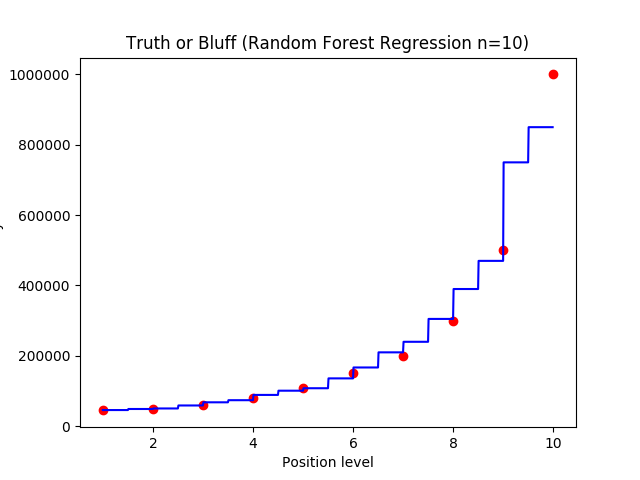

In [9]:
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor_10.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression n=10)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### B. 建立 n_estimators = 100 的 Random Forest Regression Model，名為 <span style="color:blue">regressor_100</span>

<IPython.core.display.Javascript object>


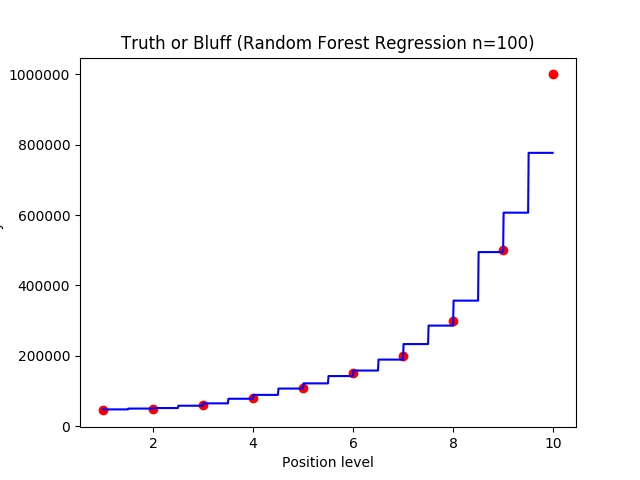

In [10]:
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor_100.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression n=100)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### C. 建立 n_estimators = 300 的 Random Forest Regression Model，名為 <span style="color:blue">regressor_300</span>

<IPython.core.display.Javascript object>


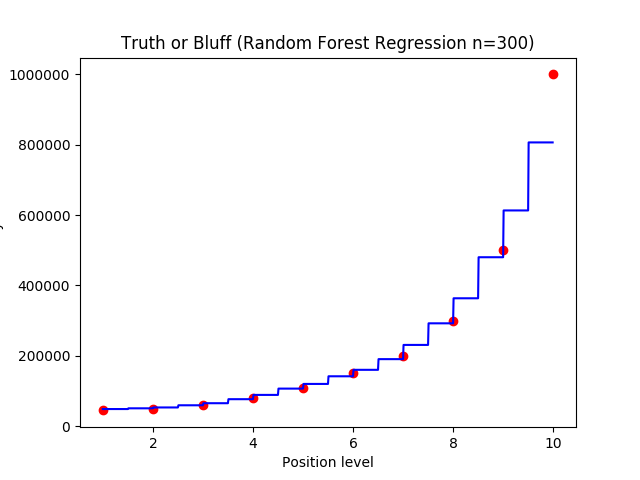

In [11]:
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor_300.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression n=300)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Predicting a new result with Linear Regression

#### A. 建立 n_estimators = 10 的 Random Forest Regression Model，名為 <span style="color:blue">regressor_10</span>

In [12]:
regressor_10.predict(6.5)

array([ 167000.])

#### B. 建立 n_estimators = 100 的 Random Forest Regression Model，名為 <span style="color:blue">regressor_100</span>

In [13]:
regressor_100.predict(6.5)

array([ 158300.])

#### C. 建立 n_estimators = 300 的 Random Forest Regression Model，名為 <span style="color:blue">regressor_300</span>

In [14]:
regressor_300.predict(6.5)

array([ 160333.33333333])

<div class="alert alert-success" role="alert">
  <strong>Answer!</strong>
</div>
利用 Random Forest Regression Model 預測 level=6.5 的年薪約為 16 萬左右